<a href="https://colab.research.google.com/github/nilsutarhan/winxclub-MIS220/blob/main/winxclub_MIS220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Train dataset
train = pd.read_csv("/content/drive/MyDrive/train.csv", header=None, error_bad_lines=False)

<ipython-input-6-4a9575214815>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/drive/MyDrive/train.csv", header=None, error_bad_lines=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [ ]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
246003,248161,-595,NaN,NaN,NaN,N,Bus3,NaN,0,2,...,NaN,-4420,NaN,NaN,0,Mard,0.0,NaN,0,0
246004,257069,-4334,0.1145,0.8368,Panl,N,Mede,0.1180,0,2,...,4.0,-2561,0.9881,0.0000,0,Sind,0.0,0.3333,0,0
246005,154350,365243,0.3025,0.6056,Mixd,N,XNAA,0.2233,0,2,...,1.0,-4636,0.9712,0.0631,0,Cive,0.0,0.1667,0,0
246006,148183,365243,NaN,NaN,NaN,N,XNAA,NaN,0,3,...,5.0,-4636,NaN,NaN,0,Mard,0.0,NaN,0,1
246007,5167,365243,NaN,NaN,NaN,Y,XNAA,NaN,0,2,...,3.0,-4266,NaN,NaN,0,Mard,0.0,NaN,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, 0 to 121
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [ ]:
train.describe()

,0,1,2,3,7,8,9,10,11,12,...,111,112,113,114,115,116,118,119,120,121
count,246008.000000,246008.000000,102179.000000,82465.000000,74197.000000,246008.000000,246008.000000,122546.000000,100023.000000,212764.000000,...,77889.000000,212764.000000,246008.000000,126059.000000,110384.000000,246008.000000,245197.000000,123711.000000,246008.000000,246008.000000
mean,153682.293458,63581.163637,0.088517,0.752671,0.042520,0.003382,2.031462,0.107454,0.066357,0.267103,...,0.101908,1.897469,-2994.150438,0.976972,0.027191,0.000004,0.143481,0.226187,0.081392,0.080729
std,88793.060523,141081.696923,0.082581,0.113380,0.074059,0.058057,0.502598,0.110625,0.081432,0.917724,...,0.093524,1.868143,1508.274570,0.065338,0.070493,0.002016,0.447988,0.144506,0.273436,0.272419
min,1.000000,-17912.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76829.750000,-2762.000000,0.044200,0.687200,0.007200,0.000000,2.000000,0.045300,0.018700,0.000000,...,0.051300,0.000000,-4298.000000,0.976700,0.000000,0.000000,0.000000,0.166700,0.000000,0.000000
50%,153532.500000,-1215.000000,0.076400,0.755200,0.019100,0.000000,2.000000,0.074400,0.048200,0.000000,...,0.076100,1.000000,-3255.000000,0.981600,0.001100,0.000000,0.000000,0.166700,0.000000,0.000000
75%,230723.250000,-291.000000,0.112300,0.823200,0.049100,0.000000,2.000000,0.130200,0.085700,0.000000,...,0.123100,3.000000,-1720.000000,0.986600,0.023225,0.000000,0.000000,0.333300,0.000000,0.000000
max,307511.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,27.000000,...,1.000000,25.000000,0.000000,1.000000,1.000000,1.000000,34.000000,1.000000,1.000000,1.000000


In [ ]:
train.shape

(246008, 122)

In [ ]:
print(train.dtypes)

0        int64
1        int64
2      float64
3      float64
4       object
        ...   
117     object
118    float64
119    float64
120      int64
121      int64
Length: 122, dtype: object


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [ ]:
train.shape

(246008, 122)

In [ ]:
train.columns = [ 'column' + str(i + 1) for i in range(len(train.columns)) ] 

In [ ]:
train.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column113,column114,column115,column116,column117,column118,column119,column120,column121,column122
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [ ]:
# Fill in missing values with average values
train = train.fillna(train.mean())
# Remove missing values
train = train.dropna()

<ipython-input-18-e3eb4162295c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [ ]:
train.shape

(52774, 122)

In [ ]:
non_floats = []
for col in train:
    if train[col].dtypes != "float64":
        non_floats.append(col)
train_2 = train.drop(columns=non_floats)

In [ ]:
train_2.shape

(52774, 65)

In [ ]:
train_2.head()

,column3,column4,column8,column11,column12,column13,column14,column18,column19,column22,...,column100,column102,column103,column110,column112,column113,column115,column116,column119,column120
0,0.161300,0.7960,0.07420,0.2281,0.065000,0.000000,180000.0,0.074000,0.000000,0.2227,...,4.0,0.3750,12.057363,0.9851,0.184700,1.000000,0.9851,0.000000,0.0,0.3333
2,0.112400,0.8504,0.03870,0.1614,0.306400,0.000000,553500.0,0.038600,0.000000,0.1485,...,1.0,0.4167,12.057363,0.9891,0.123100,2.000000,0.9891,0.000000,0.0,0.3750
13,0.088517,0.6532,0.04252,0.0252,0.066357,0.000000,787500.0,0.044585,0.008832,0.0361,...,2.0,0.1667,12.057363,0.9747,0.101908,0.000000,0.9747,0.027191,0.0,0.1250
15,0.046500,0.7892,0.03060,0.0918,0.066357,0.267103,630000.0,0.030500,0.000000,0.1010,...,1.0,0.5833,6.000000,0.9846,0.083800,1.897469,0.9846,0.000000,0.0,0.5417
20,0.076200,0.6804,0.00730,0.0523,0.016300,0.267103,180000.0,0.007200,0.019300,0.0660,...,2.0,0.2083,12.057363,0.9767,0.050400,1.897469,0.9767,0.050600,0.0,0.1667


In [ ]:
# Finding the number of columns containing NaN values
null_columns = train.columns[train.isnull().any()]
null_count = train[null_columns].isnull().sum()

print(null_count)

Series([], dtype: float64)


In [ ]:
if train.isnull().any().any():
    print("There are still NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


<ipython-input-25-794706152662>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_columns.corr()


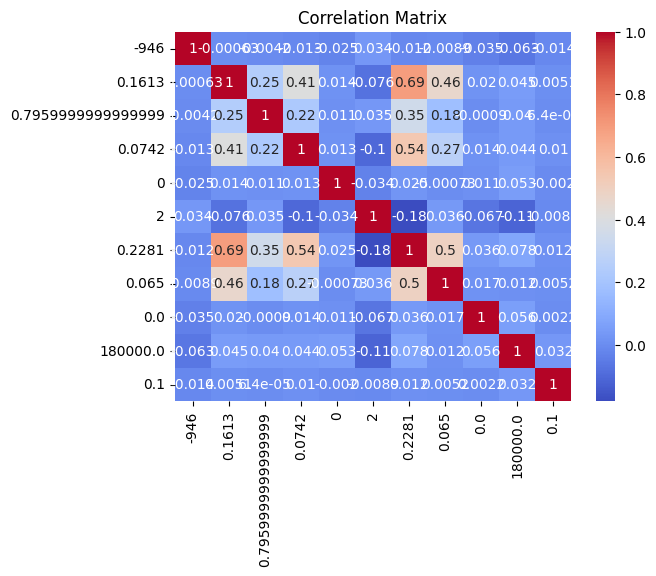

In [ ]:

# upload the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv', header=0, index_col=0)

# Select all columns between 1st and 10th columns
selected_columns = df.iloc[:, 0:15]

# Calculate the correlation matrix
corr_matrix = selected_columns.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


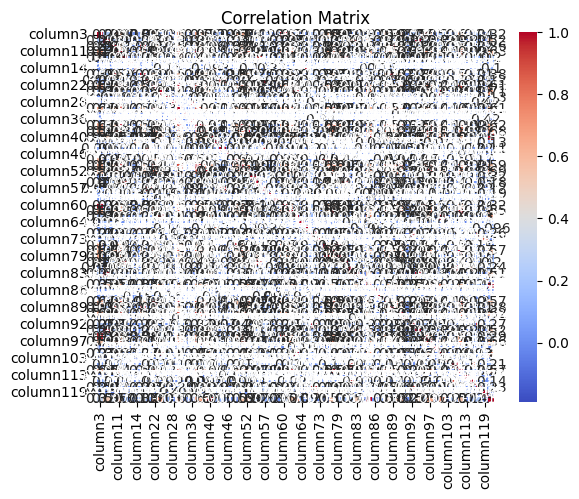

In [ ]:

# Compute the correlation matrix
corr_matrix = train_2.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# According to the correlation plot, 
#the correlation between columns 62 and 120 is closest to 1, so we looked at the histogram values between columns 62 and 120.

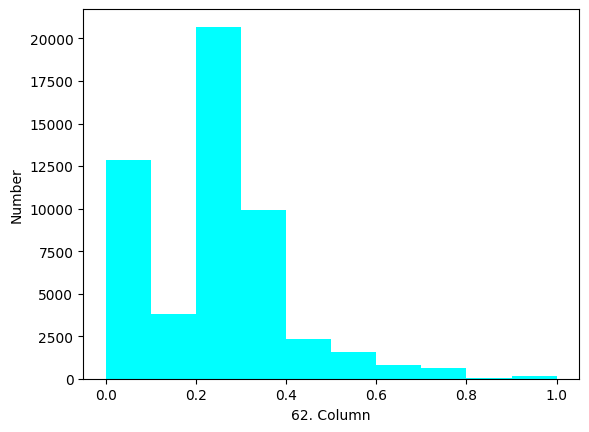

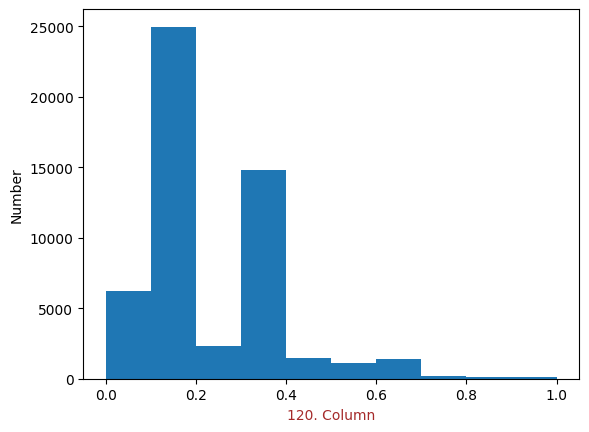

In [ ]:

# Plot the 1st column as a histogram
plt.hist(train['column62'], bins=10 ,  color='cyan')

# Set axis labels
plt.xlabel('62. Column')
plt.ylabel('Number')

# Show chart
plt.show()
# plot the 2nd column as a histogram
plt.hist(train['column120'], bins=10)

# Set axis labels
plt.xlabel('120. Column', color='brown')
plt.ylabel('Number')

# Show chart
plt.show()

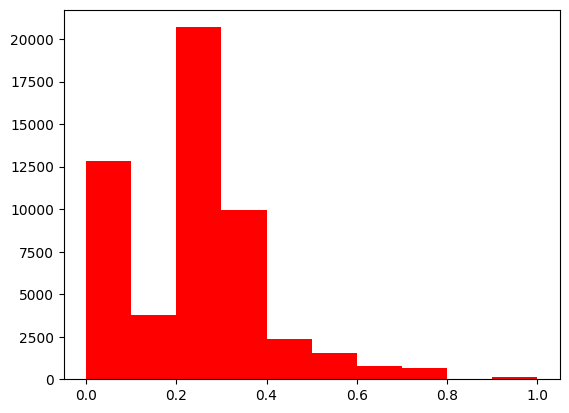

In [ ]:
# Plot a histogram of the '62' column
plt.hist(train['column62'], color=['red'])
plt.show()

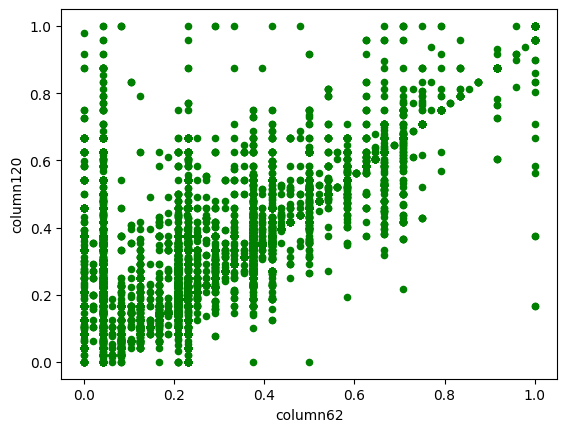

In [ ]:
train.plot.scatter(x='column62', y='column120',  color='green')
plt.show()

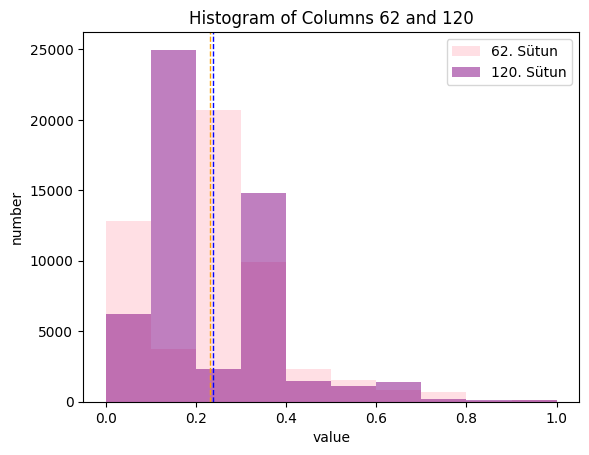

In [ ]:
# Show the histograms of the 62st and 120st columns in the same graph
plt.hist(train['column62'], bins=10, alpha=0.5, label='62. Sütun', color='pink' )
plt.hist(train['column120'], bins=10, alpha=0.5, label='120. Sütun', color='purple')

# Set axis labels and title
plt.xlabel('value')
plt.ylabel('number')
plt.title('Histogram of Columns 62 and 120')

# Add horizontal line (average)
plt.axvline(train['column62'].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(train['column120'].mean(), color='blue', linestyle='dashed', linewidth=1)

# Show visualization
plt.legend()
plt.show()